# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence.

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_colors = pd.read_csv('/content/drive/MyDrive/Python Projects/Day 74/data/colors.csv')
df_colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


# Data Exploration

How many different colours does the LEGO company produce?

In [5]:
df_colors['name'].nunique()

135

Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>.

In [6]:
df_colors['is_trans'].value_counts()

,count
is_trans,
f,107
t,28


In [7]:
df_colors.groupby('is_trans')['name'].count()

,name
is_trans,
f,107
t,28


### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [8]:
df_sets = pd.read_csv('/content/drive/MyDrive/Python Projects/Day 74/data/sets.csv')
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
df_sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [10]:
df_sets.sort_values('year')[['name', 'year']].iloc[0]

,9545
name,Small Doors and Windows Set (ABB)
year,1949


How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
first_year = df_sets['year'].min()
df_sets[df_sets['year']==first_year]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Find the top 5 LEGO sets with the most number of parts.

In [12]:
df_sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [13]:
df_sets[df_sets['year'].isin([1955, 2019])].groupby('year')['set_num'].count()

,set_num
year,
1955,28
2019,840


Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>

Text(0.5, 1.0, 'Number of LEGO Sets per Year')

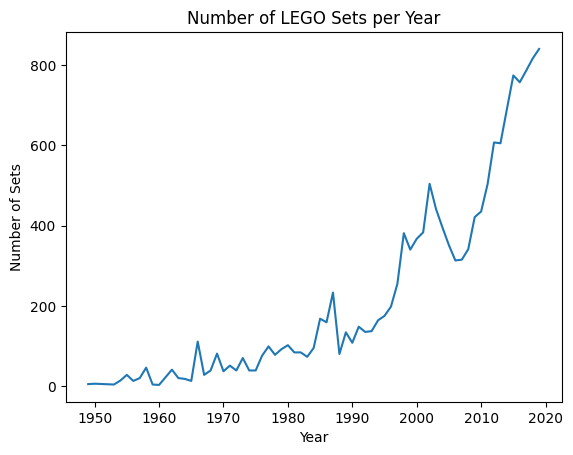

In [14]:
counted_df = df_sets.groupby('year')['set_num'].count()
plt.plot(counted_df.index[:-2], counted_df.values[:-2])
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.title('Number of LEGO Sets per Year')

We also see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart.

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [15]:
themes_by_year = df_sets.groupby('year')['theme_id'].nunique()
themes_by_year.rename('num_themse', inplace=True)
themes_by_year.head()

,num_themse
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [16]:
themes_by_year.tail()

,num_themse
year,
2017,89
2018,93
2019,78
2020,82
2021,1


Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

Text(0, 0.5, 'Number of Themes')

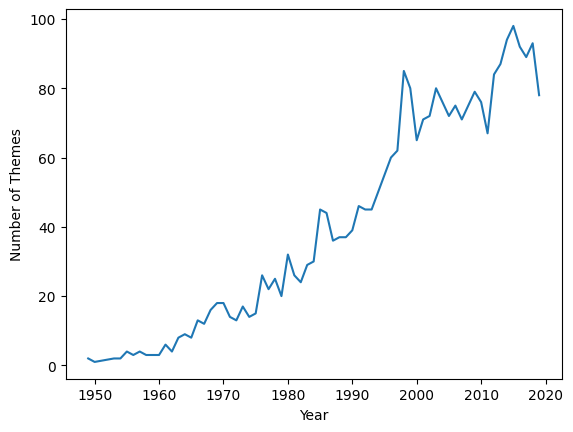

In [17]:
plt.plot(themes_by_year.index[:-2], themes_by_year.values[:-2])
plt.xlabel('Year')
plt.ylabel('Number of Themes')

In the chart, we can see that LEGO has pretty consistently added more and more themes until the mid-1990s. From then the number of themes has stagnated for around 10 years or so until the early 2010s.

### Line Charts with Two Seperate Axes

Text(0.5, 0, 'Year')

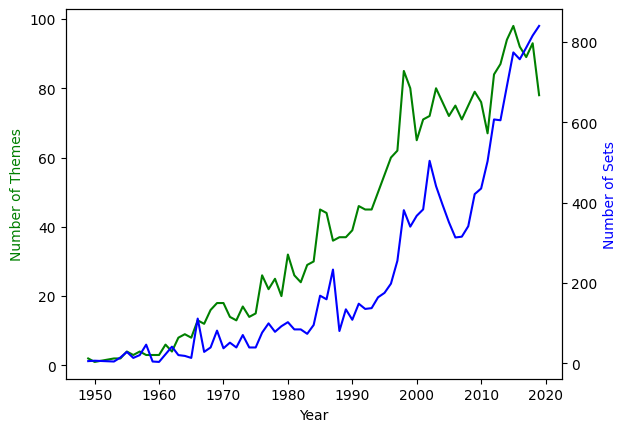

In [20]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(themes_by_year.index[:-2], themes_by_year.values[:-2], c='g')
ax1.set_ylabel('Number of Themes', color='g')
ax2.plot(counted_df.index[:-2], counted_df.values[:-2], c='b')
ax2.set_ylabel('Number of Sets', color='b')

ax1.set_xlabel('Year')

Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [22]:
parts_per_set = df_sets.groupby('year')['num_parts'].agg('mean')
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [23]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


### Scatter Plots in Matplotlib

Has the size and complexity of LEGO sets increased over time based on the number of parts?

Text(0, 0.5, 'Number of Parts')

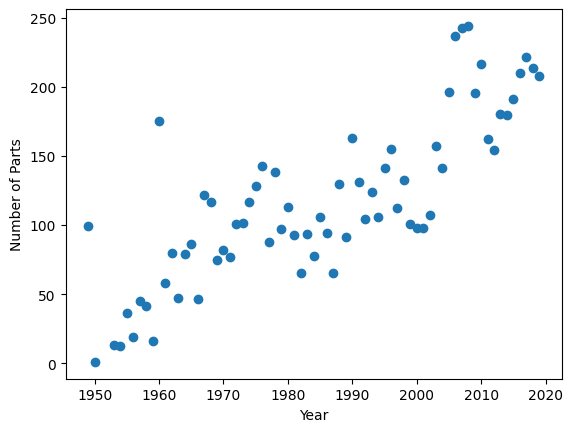

In [25]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.values[:-2])
plt.xlabel('Year')
plt.ylabel('Number of Parts')

From the chart, we can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [38]:
set_theme_count = df_sets.groupby('theme_id')['name'].count().reset_index(name='count').sort_values(by='count', ascending=False)
set_theme_count.head()

,theme_id,count
134,158,753
384,501,656
379,494,398
336,435,356
386,503,329


### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

Database schema
<img src="https://i.imgur.com/Sg4lcjx.png">

In [35]:
df_themes = pd.read_csv('/content/drive/MyDrive/Python Projects/Day 74/data/themes.csv')
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


### Merging (i.e., Combining) DataFrames based on a Key


In [41]:
merged_df = pd.merge(set_theme_count, df_themes, left_on="theme_id", right_on="id")
merged_df.head()

,theme_id,count,id,name,parent_id
0,158,753,158,Star Wars,NaN
1,501,656,501,Gear,NaN
2,494,398,494,Friends,NaN
3,435,356,435,Ninjago,NaN
4,503,329,503,Key Chain,501.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Star Wars'),
  Text(1, 0, 'Gear'),
  Text(2, 0, 'Friends'),
  Text(3, 0, 'Ninjago'),
  Text(4, 0, 'Key Chain'),
  Text(5, 0, 'Basic Set'),
  Text(6, 0, 'Books'),
  Text(7, 0, 'Town'),
  Text(8, 0, 'Supplemental'),
  Text(9, 0, 'Duplo and Explore')])

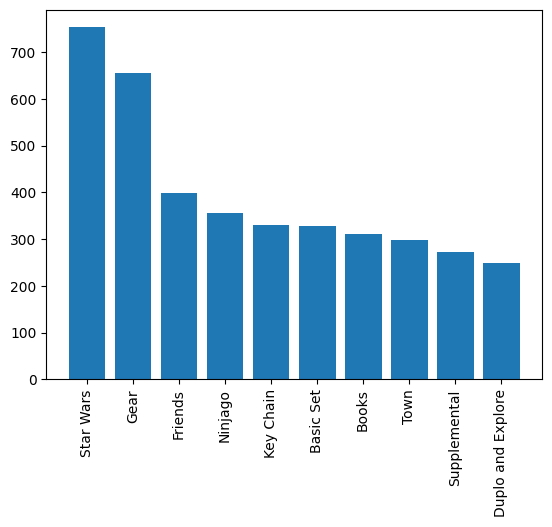

In [43]:
top_10 = merged_df.head(10)
plt.bar(top_10['name'], top_10['count'])
plt.xticks(rotation=90)